In [973]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [974]:
np.set_printoptions(threshold=np.inf)

In [975]:
df =pd.read_csv('./yosemodiFinal_with_rockfall.csv')

In [976]:
df.head()

,Type of slope movement,Season,Year,Month,Day,Time (PST),Minimum volume,Median/best estimate volume,Maximum volume,Relative size,Rock unit,Triggering condition(s),Rockfall
0,RF,NaN,1857,NaN,NaN,NaN,50000,200000,500000,extremely large,Kec,UKN,Yes
1,RF,NaN,1858,NaN,NaN,NaN,-,185000,-,extremely large,Ks/Kec,UKN,Yes
2,RF,Spring,1860,6,11,NaN,500,2000,5000,large,Ks/Kec,F/T,Yes
3,RF,Fall,1864,11,13,late pm,5000,20000,50000,very large,Ks,P,Yes
4,RF,NaN,"1868, pre",NaN,NaN,NaN,5000,20000,50000,very large,Kec,UKN,Yes


In [977]:
temp_df =df.copy()

In [978]:
temp_df.Season.unique()

array([nan, 'Spring', 'Fall', 'Summer', 'Winter', 'Winter - Spring',
       'Fall - Winter'], dtype=object)

Data Cleaning

In [979]:
season_map = {
    'Winter - Spring': 'Winter',
    'Fall - Winter': 'Fall',
    'Spring - Summer': 'Spring',
    'Summer - Fall': 'Summer'
    # Add any other combined seasons you find here
}

# Use the .replace() method with the dictionary. This works directly on the column.
temp_df['Season'] = temp_df['Season'].replace(season_map)


In [980]:
temp_df.Season.unique()

array([nan, 'Spring', 'Fall', 'Summer', 'Winter'], dtype=object)

In [981]:
temp_df.isnull().sum()

Type of slope movement           0
Season                          15
Year                             0
Month                           78
Day                            231
Time (PST)                     409
Minimum volume                   0
Median/best estimate volume      0
Maximum volume                   0
Relative size                    0
Rock unit                       27
Triggering condition(s)          0
Rockfall                         0
dtype: int64

In [982]:
temp_df['Season'] =temp_df['Season'].fillna(df['Season'].mode())

In [983]:
temp_df.isnull().sum()

Type of slope movement           0
Season                          14
Year                             0
Month                           78
Day                            231
Time (PST)                     409
Minimum volume                   0
Median/best estimate volume      0
Maximum volume                   0
Relative size                    0
Rock unit                       27
Triggering condition(s)          0
Rockfall                         0
dtype: int64

In [984]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Type of slope movement       925 non-null    object
 1   Season                       911 non-null    object
 2   Year                         925 non-null    object
 3   Month                        847 non-null    object
 4   Day                          694 non-null    object
 5   Time (PST)                   516 non-null    object
 6   Minimum volume               925 non-null    object
 7   Median/best estimate volume  925 non-null    object
 8   Maximum volume               925 non-null    object
 9   Relative size                925 non-null    object
 10  Rock unit                    898 non-null    object
 11  Triggering condition(s)      925 non-null    object
 12  Rockfall                     925 non-null    object
dtypes: object(13)
memory usage: 94.1+ K

In [985]:
columns_to_drop = ['Day', 'Month', 'Time (PST)', 'Year']
temp_df.drop(columns=columns_to_drop, inplace=True)

In [986]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Type of slope movement       925 non-null    object
 1   Season                       911 non-null    object
 2   Minimum volume               925 non-null    object
 3   Median/best estimate volume  925 non-null    object
 4   Maximum volume               925 non-null    object
 5   Relative size                925 non-null    object
 6   Rock unit                    898 non-null    object
 7   Triggering condition(s)      925 non-null    object
 8   Rockfall                     925 non-null    object
dtypes: object(9)
memory usage: 65.2+ KB


In [987]:
temp_df.isnull().sum()

Type of slope movement          0
Season                         14
Minimum volume                  0
Median/best estimate volume     0
Maximum volume                  0
Relative size                   0
Rock unit                      27
Triggering condition(s)         0
Rockfall                        0
dtype: int64

In [988]:
temp_df['Rock unit'].unique()

array(['Kec', 'Ks/Kec', 'Ks', 'Khd', 'Kgp', 'Qat', 'Kga', 'Kgp/Kec',
       'Kec/Kdg', 'Ka/Kga', 'Kg/Kec', nan, 'Khd/Kgp ', 'Kg', 'Kid/Kec',
       'Kdg', 'Ka', 'Krm', 'Pzme / Kga', 'Kga/Kec', 'Kec/Ks', 'Kgp/Ks',
       'Kyc / Kec', 'Kgi / Kg', 'Kt', 'Kyc/Kec', 'Kic', 'Kcp', 'Klt',
       'Kid', 'Kec/Kid', 'Ks/Pzme', 'Kec/Kbv', 'Pzme/Kga', 'Kbv', 'Pzme',
       'Kjdg', 'Krd', 'Klt/Kbv', 'Kec/Kt', 'Ktf'], dtype=object)

In [989]:
rock_units_to_keep = [
    'Kec', 'Ks', 'Khd', 'Kgp', 'Qat', 'Kga', 'Kdg', 'Ka', 'Krm', 'Kt',
    'Kic', 'Kcp', 'Klt', 'Kid', 'Kbv', 'Pzme', 'Kjdg', 'Krd', 'Ktf', 'Kg'
]
temp_df = temp_df[temp_df['Rock unit'].isin(rock_units_to_keep)]

In [990]:
temp_df['Rock unit'].unique()

array(['Kec', 'Ks', 'Khd', 'Kgp', 'Qat', 'Kga', 'Kg', 'Kdg', 'Ka', 'Krm',
       'Kt', 'Kic', 'Kcp', 'Klt', 'Kid', 'Kbv', 'Pzme', 'Kjdg', 'Krd',
       'Ktf'], dtype=object)

In [991]:
temp_df.isnull().sum()

Type of slope movement          0
Season                         12
Minimum volume                  0
Median/best estimate volume     0
Maximum volume                  0
Relative size                   0
Rock unit                       0
Triggering condition(s)         0
Rockfall                        0
dtype: int64

In [992]:
temp_df['Season'].fillna(temp_df['Season'].mode(),inplace=True)

C:\Users\arunc\AppData\Local\Temp\ipykernel_31448\2770787849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['Season'].fillna(temp_df['Season'].mode(),inplace=True)


In [993]:
temp_df['Type of slope movement'].unique()

array(['RF', 'RS', 'DS', 'DF', 'DF/DS', 'RS/DS', 'DSL', 'ESL', 'RS/RF',
       'RF/RS', 'RF/DS', 'SA', 'RS/ES'], dtype=object)

In [994]:
temp_df.head()

,Type of slope movement,Season,Minimum volume,Median/best estimate volume,Maximum volume,Relative size,Rock unit,Triggering condition(s),Rockfall
0,RF,Winter,50000,200000,500000,extremely large,Kec,UKN,Yes
3,RF,Fall,5000,20000,50000,very large,Ks,P,Yes
4,RF,NaN,5000,20000,50000,very large,Kec,UKN,Yes
5,RF,Summer,-,70,-,medium,Khd,L,Yes
6,RF,Summer,5000,20000,50000,very large,Kgp,UNR,Yes


In [995]:
temp_df[temp_df.duplicated()]

,Type of slope movement,Season,Minimum volume,Median/best estimate volume,Maximum volume,Relative size,Rock unit,Triggering condition(s),Rockfall
10,RF,Spring,500,2000,5000,large,Ks,EQ,Yes
40,DS,Spring,5,20,50,small,Qat,P,No
48,DF,Winter,5,20,50,small,Qat,P,No
60,DS,Spring,5,20,50,small,Qat,P,No
78,RS,Winter,5,20,50,small,Khd,P,No
...,...,...,...,...,...,...,...,...,...
885,RF,Spring,5,20,50,small,Khd,UNR,Yes
907,RF,Fall,5,20,50,small,Khd,P,Yes
910,RF,Fall,0.5,2,5,very small,Khd,UNR,Yes
913,RF,Fall,0.5,2,5,very small,Kec,UNR,Yes


In [996]:
temp_df.drop_duplicates(inplace=True)

In [997]:
temp_df.isnull().sum()

Type of slope movement          0
Season                         12
Minimum volume                  0
Median/best estimate volume     0
Maximum volume                  0
Relative size                   0
Rock unit                       0
Triggering condition(s)         0
Rockfall                        0
dtype: int64

In [998]:
temp_df['Season'].dropna(inplace=True)

In [999]:
temp_df.isnull().sum()

Type of slope movement          0
Season                         12
Minimum volume                  0
Median/best estimate volume     0
Maximum volume                  0
Relative size                   0
Rock unit                       0
Triggering condition(s)         0
Rockfall                        0
dtype: int64

Feature Engineering

In [1000]:
temp_df.head()

,Type of slope movement,Season,Minimum volume,Median/best estimate volume,Maximum volume,Relative size,Rock unit,Triggering condition(s),Rockfall
0,RF,Winter,50000,200000,500000,extremely large,Kec,UKN,Yes
3,RF,Fall,5000,20000,50000,very large,Ks,P,Yes
4,RF,NaN,5000,20000,50000,very large,Kec,UKN,Yes
5,RF,Summer,-,70,-,medium,Khd,L,Yes
6,RF,Summer,5000,20000,50000,very large,Kgp,UNR,Yes


In [1001]:
temp_df.head()

,Type of slope movement,Season,Minimum volume,Median/best estimate volume,Maximum volume,Relative size,Rock unit,Triggering condition(s),Rockfall
0,RF,Winter,50000,200000,500000,extremely large,Kec,UKN,Yes
3,RF,Fall,5000,20000,50000,very large,Ks,P,Yes
4,RF,NaN,5000,20000,50000,very large,Kec,UKN,Yes
5,RF,Summer,-,70,-,medium,Khd,L,Yes
6,RF,Summer,5000,20000,50000,very large,Kgp,UNR,Yes


In [1002]:
print("\n--- Adding Simulated 'slope_angle_degrees' Feature ---")
min_slope = 45
most_common_slope = 75
max_slope = 90
number_of_rows = len(temp_df)

# Generate the random slope values
simulated_slopes = np.random.triangular(min_slope, most_common_slope, max_slope, number_of_rows)

# Add the new feature to the DataFrame, rounded to one decimal place
temp_df['slope_angle_degrees'] = np.round(simulated_slopes, 1)


--- Adding Simulated 'slope_angle_degrees' Feature ---


In [1003]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 0 to 924
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type of slope movement       641 non-null    object 
 1   Season                       629 non-null    object 
 2   Minimum volume               641 non-null    object 
 3   Median/best estimate volume  641 non-null    object 
 4   Maximum volume               641 non-null    object 
 5   Relative size                641 non-null    object 
 6   Rock unit                    641 non-null    object 
 7   Triggering condition(s)      641 non-null    object 
 8   Rockfall                     641 non-null    object 
 9   slope_angle_degrees          641 non-null    float64
dtypes: float64(1), object(9)
memory usage: 55.1+ KB


In [1004]:
temp_df.head()

,Type of slope movement,Season,Minimum volume,Median/best estimate volume,Maximum volume,Relative size,Rock unit,Triggering condition(s),Rockfall,slope_angle_degrees
0,RF,Winter,50000,200000,500000,extremely large,Kec,UKN,Yes,69.0
3,RF,Fall,5000,20000,50000,very large,Ks,P,Yes,61.3
4,RF,NaN,5000,20000,50000,very large,Kec,UKN,Yes,64.8
5,RF,Summer,-,70,-,medium,Khd,L,Yes,74.1
6,RF,Summer,5000,20000,50000,very large,Kgp,UNR,Yes,69.3


In [1005]:
volume_cols = ['Minimum volume', 'Median/best estimate volume', 'Maximum volume']

# Loop through each column to apply the cleaning and conversion logic
for col in volume_cols:
    # Convert to numeric, forcing errors (like '-') into NaN (Not a Number)
    temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce')

    # Calculate the median for the current column to fill the NaNs
    median_val = temp_df[col].median()
    temp_df[col].fillna(median_val, inplace=True)

    # Convert the column to an integer type for efficiency
    temp_df[col] = temp_df[col].astype(int)

# Rename the columns to be shorter and more convenient
rename_dict = {
    'Minimum volume': 'min_volume',
    'Median/best estimate volume': 'median_volume',
    'Maximum volume': 'max_volume'
}
temp_df.rename(columns=rename_dict, inplace=True)

C:\Users\arunc\AppData\Local\Temp\ipykernel_31448\1420333791.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna(median_val, inplace=True)
C:\Users\arunc\AppData\Local\Temp\ipykernel_31448\1420333791.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [1006]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 0 to 924
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type of slope movement   641 non-null    object 
 1   Season                   629 non-null    object 
 2   min_volume               641 non-null    int64  
 3   median_volume            641 non-null    int64  
 4   max_volume               641 non-null    int64  
 5   Relative size            641 non-null    object 
 6   Rock unit                641 non-null    object 
 7   Triggering condition(s)  641 non-null    object 
 8   Rockfall                 641 non-null    object 
 9   slope_angle_degrees      641 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 55.1+ KB


In [1007]:
temp_df['Relative size'].unique()

array(['extremely large', 'very large', 'medium', 'large', 'very small',
       'small', 'See ID 1930031801', 'extremely small',
       'See ID 1987031001', 'See ID 1996071101', 'small ',
       'See ID 1998111601', 'very small ', 'See ID 2001091401',
       'See ID 2003060601', 'See ID 2003071801', 'See ID 2006043001',
       'See ID 2008110101'], dtype=object)

In [1008]:
size_map = {
    'extremely small': 'small', 'very small': 'small', 'small': 'small',
    'small ': 'small', 'very small ': 'small',
    'medium': 'medium',
    'large': 'large', 'very large': 'large', 'extremely large': 'large'
}

# Apply the mapping. Anything not in the map's keys (like 'See ID...') will become NaN.
temp_df['Relative size'] = temp_df['Relative size'].map(size_map)

# Now, drop any rows where the size is NaN, effectively keeping only small, medium, and large.
temp_df.dropna(subset=['Relative size'], inplace=True)

In [1009]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 924
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type of slope movement   631 non-null    object 
 1   Season                   619 non-null    object 
 2   min_volume               631 non-null    int64  
 3   median_volume            631 non-null    int64  
 4   max_volume               631 non-null    int64  
 5   Relative size            631 non-null    object 
 6   Rock unit                631 non-null    object 
 7   Triggering condition(s)  631 non-null    object 
 8   Rockfall                 631 non-null    object 
 9   slope_angle_degrees      631 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 54.2+ KB


In [1010]:
temp_df.head()

,Type of slope movement,Season,min_volume,median_volume,max_volume,Relative size,Rock unit,Triggering condition(s),Rockfall,slope_angle_degrees
0,RF,Winter,50000,200000,500000,large,Kec,UKN,Yes,69.0
3,RF,Fall,5000,20000,50000,large,Ks,P,Yes,61.3
4,RF,NaN,5000,20000,50000,large,Kec,UKN,Yes,64.8
5,RF,Summer,5,70,50,medium,Khd,L,Yes,74.1
6,RF,Summer,5000,20000,50000,large,Kgp,UNR,Yes,69.3


In [1011]:
temp_df['Rock unit'].unique()

array(['Kec', 'Ks', 'Khd', 'Kgp', 'Qat', 'Kga', 'Kg', 'Kdg', 'Ka', 'Krm',
       'Kt', 'Kic', 'Kcp', 'Klt', 'Kid', 'Kbv', 'Pzme', 'Kjdg', 'Krd',
       'Ktf'], dtype=object)

In [1012]:
rock_unit_map = {
    'Kec': 'Kec', 'Ks': 'Ks', 'Khd': 'Khd', 'Kgp': 'Kgp', 'Qat': 'Qat',
    'Kga': 'Kga', 'Kg': 'Kg', 'Kdg': 'Kdg', 'Ka': 'Ka', 'Krm': 'Krm',
    'Kt': 'Kt', 'Kic': 'Kic', 'Kcp': 'Kcp', 'Klt': 'Klt', 'Kid': 'Kid',
    'Kbv': 'Kbv', 'Pzme': 'Pzme', 'Kjdg': 'Kjdg', 'Krd': 'Krd', 'Ktf': 'Ktf',
    # Composite units are mapped to their primary (first) type
    'Ks/Kec': 'Ks', 'Kgp/Kec': 'Kgp', 'Kec/Kdg': 'Kec', 'Ka/Kga': 'Ka',
    'Kg/Kec': 'Kg', 'Kid/Kec': 'Kid', 'Pzme / Kga': 'Pzme', 'Kga/Kec': 'Kga',
    'Kec/Ks': 'Kec', 'Kgp/Ks': 'Kgp', 'Kyc / Kec': 'Kyc', 'Kgi / Kg': 'Kgi',
    'Kyc/Kec': 'Kyc', 'Kec/Kid': 'Kec', 'Ks/Pzme': 'Ks', 'Kec/Kbv': 'Kec',
    'Pzme/Kga': 'Pzme', 'Klt/Kbv': 'Klt', 'Kec/Kt': 'Kec'
}

# Apply the mapping. Anything not in the map's keys will become NaN.
temp_df['Rock unit'] = temp_df['Rock unit'].map(rock_unit_map)

In [1013]:
temp_df['Rock unit'].unique()

array(['Kec', 'Ks', 'Khd', 'Kgp', 'Qat', 'Kga', 'Kg', 'Kdg', 'Ka', 'Krm',
       'Kt', 'Kic', 'Kcp', 'Klt', 'Kid', 'Kbv', 'Pzme', 'Kjdg', 'Krd',
       'Ktf'], dtype=object)

In [1014]:
temp_df.head()

,Type of slope movement,Season,min_volume,median_volume,max_volume,Relative size,Rock unit,Triggering condition(s),Rockfall,slope_angle_degrees
0,RF,Winter,50000,200000,500000,large,Kec,UKN,Yes,69.0
3,RF,Fall,5000,20000,50000,large,Ks,P,Yes,61.3
4,RF,NaN,5000,20000,50000,large,Kec,UKN,Yes,64.8
5,RF,Summer,5,70,50,medium,Khd,L,Yes,74.1
6,RF,Summer,5000,20000,50000,large,Kgp,UNR,Yes,69.3


In [1015]:
temp_df['Triggering condition(s)'].unique()

array(['UKN', 'P', 'L', 'UNR', 'EQ', 'R/S', 'C', 'SM', 'F/T', 'B',
       'F/T, TS', 'GV', 'L,P', 'L ', 'P, SM', 'P, F/T', 'EQ, P', 'P, RW',
       'TS, F/T', 'SM, F/T', 'TS', 'RW', 'P, TS', 'SA', 'SM, CP', 'CP',
       'F/T, P', 'TS, L', 'RW, F/T', 'TS/CP'], dtype=object)

In [1016]:
def standardize_trigger(trigger_string):
    """Maps complex trigger descriptions to a set of primary categories."""
    if not isinstance(trigger_string, str):
        return 'Spontaneous'  # Handle non-string (e.g., float NaN) inputs

    # Define primary triggers based on keywords, in a specific priority order
    if 'P' in trigger_string or 'TS' in trigger_string or 'SM' in trigger_string or 'CP' in trigger_string:
        return 'Precipitation'
    if 'F/T' in trigger_string:
        return 'Freeze-Thaw'
    if 'EQ' in trigger_string:
        return 'Earthquake'
    if 'L' in trigger_string.strip():  # .strip() handles cases like 'L '
        return 'Light/Thermal'
    
    # Group all other known (UNR, UKN) and unknown codes into a single category
    return 'Spontaneous'

temp_df['trigger'] = temp_df['Triggering condition(s)'].apply(standardize_trigger)
temp_df.drop(columns=['Triggering condition(s)'], inplace=True)

In [1017]:
temp_df['trigger'].unique()

array(['Spontaneous', 'Precipitation', 'Light/Thermal', 'Earthquake',
       'Freeze-Thaw'], dtype=object)

In [1018]:
temp_df.head()

,Type of slope movement,Season,min_volume,median_volume,max_volume,Relative size,Rock unit,Rockfall,slope_angle_degrees,trigger
0,RF,Winter,50000,200000,500000,large,Kec,Yes,69.0,Spontaneous
3,RF,Fall,5000,20000,50000,large,Ks,Yes,61.3,Precipitation
4,RF,NaN,5000,20000,50000,large,Kec,Yes,64.8,Spontaneous
5,RF,Summer,5,70,50,medium,Khd,Yes,74.1,Light/Thermal
6,RF,Summer,5000,20000,50000,large,Kgp,Yes,69.3,Spontaneous


In [1019]:
temp_df['Season'].unique()

array(['Winter', 'Fall', nan, 'Summer', 'Spring'], dtype=object)

In [1020]:
temp_df['Season'].isna().sum()

np.int64(12)

In [1021]:
temp_df['Season'].mode()[0]

'Spring'

In [1022]:
temp_df['Season'].fillna(temp_df['Season'].mode()[0],inplace=True)

C:\Users\arunc\AppData\Local\Temp\ipykernel_31448\2971330179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['Season'].fillna(temp_df['Season'].mode()[0],inplace=True)


In [1023]:
temp_df.isnull().sum()

Type of slope movement    0
Season                    0
min_volume                0
median_volume             0
max_volume                0
Relative size             0
Rock unit                 0
Rockfall                  0
slope_angle_degrees       0
trigger                   0
dtype: int64

In [1024]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 924
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type of slope movement  631 non-null    object 
 1   Season                  631 non-null    object 
 2   min_volume              631 non-null    int64  
 3   median_volume           631 non-null    int64  
 4   max_volume              631 non-null    int64  
 5   Relative size           631 non-null    object 
 6   Rock unit               631 non-null    object 
 7   Rockfall                631 non-null    object 
 8   slope_angle_degrees     631 non-null    float64
 9   trigger                 631 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 54.2+ KB


In [1025]:
temp_df['Type of slope movement'].unique()

array(['RF', 'RS', 'DS', 'DF', 'DF/DS', 'RS/DS', 'DSL', 'ESL', 'RS/RF',
       'RF/RS', 'RF/DS', 'SA', 'RS/ES'], dtype=object)

In [1026]:
temp_df.head()

,Type of slope movement,Season,min_volume,median_volume,max_volume,Relative size,Rock unit,Rockfall,slope_angle_degrees,trigger
0,RF,Winter,50000,200000,500000,large,Kec,Yes,69.0,Spontaneous
3,RF,Fall,5000,20000,50000,large,Ks,Yes,61.3,Precipitation
4,RF,Spring,5000,20000,50000,large,Kec,Yes,64.8,Spontaneous
5,RF,Summer,5,70,50,medium,Khd,Yes,74.1,Light/Thermal
6,RF,Summer,5000,20000,50000,large,Kgp,Yes,69.3,Spontaneous


Independent & Dependent

In [1027]:
temp_df['Rockfall'].value_counts()

Rockfall
Yes    385
No     246
Name: count, dtype: int64

In [1028]:
X =temp_df.drop(columns=['Rockfall'])
y =temp_df['Rockfall']

In [1052]:
X.head()

,Type of slope movement,Season,min_volume,median_volume,max_volume,Relative size,Rock unit,slope_angle_degrees,trigger
0,RF,Winter,50000,200000,500000,large,Kec,69.0,Spontaneous
3,RF,Fall,5000,20000,50000,large,Ks,61.3,Precipitation
4,RF,Spring,5000,20000,50000,large,Kec,64.8,Spontaneous
5,RF,Summer,5,70,50,medium,Khd,74.1,Light/Thermal
6,RF,Summer,5000,20000,50000,large,Kgp,69.3,Spontaneous


In [1053]:
X['trigger'].unique()

array(['Spontaneous', 'Precipitation', 'Light/Thermal', 'Earthquake',
       'Freeze-Thaw'], dtype=object)

In [1029]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [1030]:
scalerY =LabelEncoder()
y =scalerY.fit_transform(y)

Train test split

In [1031]:
numeric_features =X.select_dtypes(exclude="object").columns
cat_features =X.select_dtypes(include="object").columns

In [1032]:
from sklearn.model_selection import train_test_split

In [1033]:
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=10)

In [1034]:
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])


In [1035]:
preprocessor = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(handle_unknown='ignore'), cat_features),
        ("scaler", StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # This is the key addition
)

In [1055]:
X_train.head()

,Type of slope movement,Season,min_volume,median_volume,max_volume,Relative size,Rock unit,slope_angle_degrees,trigger
398,RF,Summer,5,20,50,small,Khd,80.1,Spontaneous
138,RS,Spring,500,2000,5000,large,Kga,76.3,Precipitation
883,RF,Spring,5,5,50,small,Kec,77.6,Precipitation
675,RF,Fall,5,20,50,small,Khd,70.8,Precipitation
473,RF,Winter,5,3,50,small,Kga,60.7,Spontaneous


In [1036]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [1054]:
X_train.columns

Index(['Type of slope movement', 'Season', 'min_volume', 'median_volume',
       'max_volume', 'Relative size', 'Rock unit', 'slope_angle_degrees',
       'trigger'],
      dtype='object')

In [1056]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 398 to 432
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type of slope movement  504 non-null    object 
 1   Season                  504 non-null    object 
 2   min_volume              504 non-null    int64  
 3   median_volume           504 non-null    int64  
 4   max_volume              504 non-null    int64  
 5   Relative size           504 non-null    object 
 6   Rock unit               504 non-null    object 
 7   slope_angle_degrees     504 non-null    float64
 8   trigger                 504 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 39.4+ KB


In [1037]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


RandomForest Accuracy: 0.9921

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      0.99        77

    accuracy                           0.99       127
   macro avg       0.99      0.99      0.99       127
weighted avg       0.99      0.99      0.99       127

RandomForest Confusion Matrix:


Text(0.5, 14.722222222222216, 'Predicted')

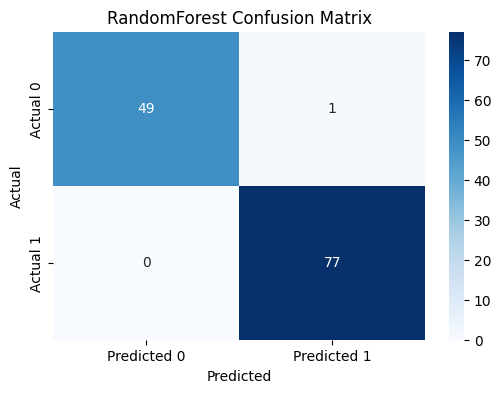

In [1040]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=3, random_state=2,max_depth=5))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# --- Evaluate the RandomForest Model ---
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandomForest Accuracy: {accuracy_rf:.4f}")

print("\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("RandomForest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plotting the confusion matrix for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('RandomForest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1041]:
temp_df.to_csv('my_data.csv', index=False)

In [1047]:
import pickle


filename = 'model.pkl'

# Open the file in write-binary ('wb') mode and save the pipeline
with open(filename, 'wb') as file:
    pickle.dump(rf_pipeline, file)

print(f"\nPipeline saved successfully to {filename}")


Pipeline saved successfully to model.pkl
